In [2]:
import seaborn as sns; sns.set()

In [3]:
%matplotlib inline

In [4]:
import pickle
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import numpy as np
# def moving_avg(series, window = 5, fnc=np.mean):
#     for i in range(len(series)):
#         avg = fnc(series[max(i-window//2, 0):i] + series[i:i+window//2])
#         yield avg

def moving_agg(series, window = 5, fnc=np.mean, window_placement='midpoint'):
    assert window_placement in ['midpoint', 'leading', 'trailing']
    if window_placement == 'midpoint':
        window_fnc = lambda i: (max(i-window//2, 0), i+window//2)
    elif window_placement == 'leading':
        window_fnc = lambda i: (max(i - window, 0), i + 1)
    else:
        window_fnc = lambda i: (i, window + i)
    for i in range(len(series)):
        start, end = window_fnc(i)
        agg = fnc(series[start:end])
        yield agg

def mean_and_best_100_df(results, name='vanilla'):
    mean_100 = list(moving_agg(results, window=100, fnc=np.mean, window_placement='leading'))
    best_mean_100 = list(moving_agg(mean_100, window=len(mean_100), fnc=np.max, window_placement='leading'))

    t = np.arange(len(mean_100)) * 10000 + 50000
    data = pd.DataFrame({
        'timestep': t,
        'reward': mean_100,
        'name': name,
        'type': 'mean'
    })
    data_best = pd.DataFrame({
        'timestep': t,
        'reward': best_mean_100,
        'name': name,
        'type': 'best'
    })
    data = pd.concat([data, data_best], axis=0)
    return data

In [7]:
with open('basicq.pkl', 'rb') as open_file:
    results = pickle.load(open_file)

In [8]:
data = mean_and_best_100_df(results, 'vanilla')

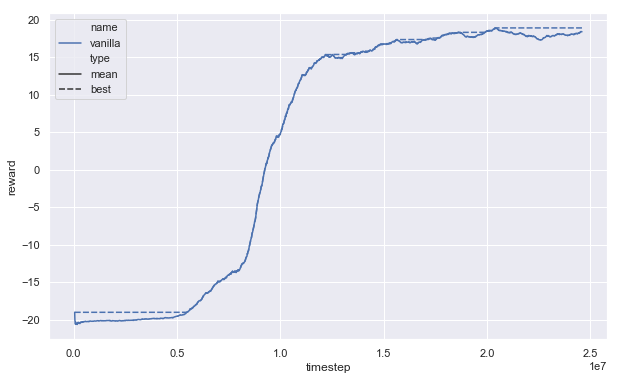

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='timestep', y='reward', hue='name', style='type')
plt.savefig('p1q1.png')

In [10]:
with open('doubleq.pkl', 'rb') as open_file:
    dqn_results = pickle.load(open_file)
    

In [11]:
dqn_data = mean_and_best_100_df(dqn_results, 'double q')
data = pd.concat([data, dqn_data], axis=0)

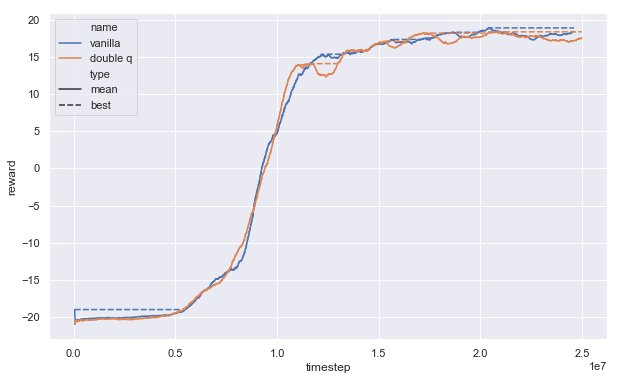

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data.query('timestep < 2.5e7'), x='timestep', y='reward', hue='name', style='type')
plt.savefig('p1q2.png')

In [13]:
with open('doubleq_freq5000.pkl', 'rb') as open_file:
    results_5k = mean_and_best_100_df(pickle.load(open_file), '5k')

In [14]:
with open('doubleq_freq2500.pkl', 'rb') as open_file:
    results_2k = mean_and_best_100_df(pickle.load(open_file), '2.5k')

In [15]:
with open('doubleq_freq15000.pkl', 'rb') as open_file:
    results_15k = mean_and_best_100_df(pickle.load(open_file), '15k')

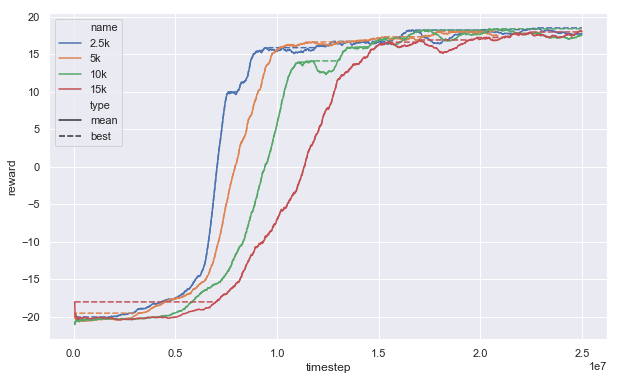

In [16]:
results_10k = dqn_data.copy()
results_10k['name'] = '10k'
data = pd.concat([results_2k, results_5k, results_10k, results_15k], axis=0)

plt.figure(figsize=(10,6))
sns.lineplot(data=data.query('timestep < 2.5e7'), x='timestep', y='reward', hue='name', style='type')
plt.savefig('p1q3.png')